# Great Challenges '20 target problem notebook

## First. The import

In [247]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.ensemble import *
from sklearn.metrics import *
from sklearn.model_selection import *
from graphviz import *
%matplotlib inline
sns.set(rc = {'figure.figsize':(9, 6)})

## Second. Data Preprocession

### Read data first

In [156]:
activity = pd.read_csv(r'..\data\CSV\activity.csv', sep=';')

In [157]:
activity.head()

,user_id,last_name,first_name,last_login_utc,Вводный модуль. (steps),Вводный модуль. (score / max_score),Фундаментальный взгляд на развитие образования. А.Г. Асмолов (steps),Фундаментальный взгляд на развитие образования. А.Г. Асмолов (score / max_score),Современные подходы к образованию. Дима Зицер (steps),Современные подходы к образованию. Дима Зицер (score / max_score),Работа с семьями: консультирование детей и родителей (steps),Работа с семьями: консультирование детей и родителей (score / max_score),Педагогика современности: инструменты и ресурсы (steps),Педагогика современности: инструменты и ресурсы (score / max_score),Завершающий модуль (бонус). (steps),Завершающий модуль (бонус). (score / max_score),total (steps),total (score / max_score)
0,220676,Shujkova,INESSA,2021-01-13 11:42:12,11.11%,0.00%,17.39%,2.78%,37.21%,26.47%,9.76%,0.00%,14.29%,0.00%,0.00%,0.00%,18.75%,6.80%
1,235431,Severyn,Valentyna,2020-07-22 13:46:52,11.11%,0.00%,2.17%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,1.14%,0.00%
2,326719,Omskiy,Omar,2021-01-02 08:47:26,100.00%,100.00%,93.48%,97.22%,88.37%,97.06%,92.68%,90.62%,96.43%,95.83%,0.00%,0.00%,88.07%,86.39%
3,377678,Deryusheva,Evgeniya,2019-12-09 10:27:59,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%
4,1360625,Минин,Антон,2020-12-13 23:02:43,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%


In [158]:
activity_full = pd.read_csv(r'..\data\CSV\activity-full.csv', sep=';')

In [159]:
activity_full.head()

,user_id,last_name,first_name,Педагогические ситуации T1 (passed),Педагогические ситуации Q2 (score / max_score),Педагогические ситуации Q2 (n_attempts),Педагогические ситуации Q2 (correct_rate),Педагогические ситуации Q3 (score / max_score),Педагогические ситуации Q3 (n_attempts),Педагогические ситуации Q3 (correct_rate),...,Педагогические ситуации. Личный взгляд педагога. Q8 (score / max_score),Педагогические ситуации. Личный взгляд педагога. Q8 (n_attempts),Педагогические ситуации. Личный взгляд педагога. Q8 (correct_rate),Педагогические ситуации. Личный взгляд педагога. T9 (passed),Педагогические ситуации. Личный взгляд педагога. (score / max_score),Педагогические ситуации. Личный взгляд педагога. (n_attempts),Завершающий модуль (бонус). (score / max_score),Завершающий модуль (бонус). (n_attempts),"Формула образования. Школа: ученик, родитель, учитель. (score / max_score)","Формула образования. Школа: ученик, родитель, учитель. (n_attempts)"
0,220676,Shujkova,INESSA,ИСТИНА,0.00%,0,0.00%,0.00%,0,0.00%,...,0.00%,0,0.00%,ЛОЖЬ,0.00%,0,0.00%,0,6.80%,38
1,235431,Severyn,Valentyna,ИСТИНА,0.00%,0,0.00%,0.00%,0,0.00%,...,0.00%,0,0.00%,ЛОЖЬ,0.00%,0,0.00%,0,0.00%,0
2,326719,Omskiy,Omar,ИСТИНА,100.00%,1,100.00%,100.00%,1,100.00%,...,0.00%,0,0.00%,ЛОЖЬ,0.00%,0,0.00%,0,86.39%,192
3,377678,Deryusheva,Evgeniya,ЛОЖЬ,0.00%,0,0.00%,0.00%,0,0.00%,...,0.00%,0,0.00%,ЛОЖЬ,0.00%,0,0.00%,0,0.00%,0
4,1360625,Минин,Антон,ЛОЖЬ,0.00%,0,0.00%,0.00%,0,0.00%,...,0.00%,0,0.00%,ЛОЖЬ,0.00%,0,0.00%,0,0.00%,0


In [160]:
cheating = pd.read_csv(r'..\data\CSV\cheating.csv', sep=';')

In [161]:
cheating.head()

,user_id,last_name,first_name,lesson_id,step_id,step_position,step_url,cheating_probability (%)
0,127890,Новиков,Дмитрий,347108,1265485,2,https://stepik.org/lesson/347108/step/2,4.14
1,127890,Новиков,Дмитрий,347108,1270620,3,https://stepik.org/lesson/347108/step/3,4.14
2,127890,Новиков,Дмитрий,347108,1270886,4,https://stepik.org/lesson/347108/step/4,4.14
3,127890,Новиков,Дмитрий,347108,1270897,5,https://stepik.org/lesson/347108/step/5,4.14
4,127890,Новиков,Дмитрий,347108,1270914,6,https://stepik.org/lesson/347108/step/6,4.14


In [162]:
grade_book1=pd.read_csv(r'..\data\CSV\grade-book (1).csv', sep=';')

In [163]:
grade_book1.head()

,user_id,last_name,first_name,Педагогические ситуации Q2,Педагогические ситуации Q3,Педагогические ситуации Q4,Педагогические ситуации Q5,Педагогические ситуации Q6,Педагогические ситуации Q7,Педагогические ситуации Q8,...,Педагогические ситуации. Личный взгляд педагога. Q7,Педагогические ситуации. Личный взгляд педагога. Q8,total,date_joined_utc,last_viewed_utc,certificate_issue_date_utc,certificate_issue_regular_date_utc,certificate_issue_distinction_date_utc,certificate_update_date_utc,certificate_url
0,73886792,"одаренных детей ""Стратегия""",ГОАОУ Центр поддержки,0,0,0,0,0,0,0,...,0,0,0,2020-04-22 05:43:28,2020-06-30 06:35:07,NaN,NaN,NaN,NaN,NaN
1,220676,Shujkova,INESSA,0,0,0,0,0,0,0,...,0,0,10,2020-04-22 09:05:19,2020-06-05 10:42:18,NaN,NaN,NaN,NaN,NaN
2,35624313,Злобин,Максим,0,0,0,0,0,0,0,...,0,0,0,2020-04-23 06:26:14,2020-04-24 08:16:33,NaN,NaN,NaN,NaN,NaN
3,220677450,"""ИРО""",ГАУДПО Липецкой области,1,1,1,1,1,1,1,...,0,0,55,2020-04-23 11:37:24,2020-11-10 10:52:28,NaN,NaN,NaN,NaN,NaN
4,222220413,Константин Андреевич,Ротобыльский,0,0,0,0,0,0,0,...,0,0,0,2020-04-25 16:30:18,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
grade_book_short = pd.read_csv(r'..\data\CSV\grade-book-short.csv', sep=';')
grade_book_short.head()

,user_id,last_name,first_name,invitation_email,Вводный модуль.,"Вводный модуль. , %",Фундаментальный взгляд на развитие образования. А.Г. Асмолов,"Фундаментальный взгляд на развитие образования. А.Г. Асмолов, %",Современные подходы к образованию. Дима Зицер,"Современные подходы к образованию. Дима Зицер, %",Работа с семьями: консультирование детей и родителей,"Работа с семьями: консультирование детей и родителей, %",Педагогика современности: инструменты и ресурсы,"Педагогика современности: инструменты и ресурсы, %",Завершающий модуль (бонус).,"Завершающий модуль (бонус)., %",total,"total, %"
0,73886792,"одаренных детей ""Стратегия""",ГОАОУ Центр поддержки,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,220676,Shujkova,INESSA,NaN,0,0,1,"2,78",9,"26,47",0,0,0,0,0,0,10,"6,8"
2,35624313,Злобин,Максим,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,220677450,"""ИРО""",ГАУДПО Липецкой области,NaN,7,100,11,"30,56",6,"17,65",31,"96,88",0,0,0,0,55,"37,41"
4,222220413,Константин Андреевич,Ротобыльский,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [165]:
grade_book_without_deadlines = pd.read_csv(r'..\data\CSV\grade-book-without-deadlines.csv', sep=';')
grade_book_without_deadlines.head()

,user_id,last_name,first_name,Педагогические ситуации Q2,Педагогические ситуации Q3,Педагогические ситуации Q4,Педагогические ситуации Q5,Педагогические ситуации Q6,Педагогические ситуации Q7,Педагогические ситуации Q8,...,Педагогические ситуации. Личный взгляд педагога. Q7,Педагогические ситуации. Личный взгляд педагога. Q8,total,date_joined_utc,last_viewed_utc,certificate_issue_date_utc,certificate_issue_regular_date_utc,certificate_issue_distinction_date_utc,certificate_update_date_utc,certificate_url
0,220676,Shujkova,INESSA,0,0,0,0,0,0,0,...,0,0,10,2020-04-22 09:05:19,2020-06-05 10:42:18,NaN,NaN,NaN,NaN,NaN
1,235431,Severyn,Valentyna,0,0,0,0,0,0,0,...,0,0,0,2020-06-20 05:36:08,2020-06-20 18:33:29,NaN,NaN,NaN,NaN,NaN
2,326719,Omskiy,Omar,1,1,1,1,1,1,1,...,0,0,127,2020-05-12 19:21:31,2020-05-30 14:53:46,2020-06-01 06:18:19,2020-06-01 06:18:19,NaN,NaN,https://stepik.org/certificate/2863ae04c05f11a...
3,377678,Deryusheva,Evgeniya,0,0,0,0,0,0,0,...,0,0,0,2020-06-24 17:02:34,NaN,NaN,NaN,NaN,NaN,NaN
4,1360625,Минин,Антон,0,0,0,0,0,0,0,...,0,0,0,2020-05-10 21:27:38,NaN,NaN,NaN,NaN,NaN,NaN


In [166]:
learners = pd.read_csv(r'..\data\CSV\learners.csv', sep=';')
learners.head()

,user_id,last_name,first_name,invitation_email,last_login_utc,date_joined_utc
0,220676,Shujkova,INESSA,NaN,2021-01-13 11:42:12,2020-04-22 09:05:19
1,35624313,Злобин,Максим,NaN,2020-11-07 12:08:17,2020-04-23 06:26:14
2,222220413,Константин Андреевич,Ротобыльский,NaN,2020-04-25 16:03:40,2020-04-25 16:30:18
3,223158207,Наталья,Савченко,NaN,2020-04-27 19:08:08,2020-04-27 06:19:12
4,223176788,Демьянова,Надежда,NaN,2020-04-27 06:40:40,2020-04-27 06:41:54


In [167]:
not_finished_review_sessions = pd.read_csv(r'..\data\CSV\not-finished-review-sessions.csv', sep=';')
not_finished_review_sessions.head()

,course_id,user_id,last_name,first_name,session_id,step_id,type,is_taking_finished,is_giving_finished,taken_reviews_count,given_reviews_count,last_taken_review_date_utc,last_given_review_date_utc,submission_id,submission_date_utc,session_url
0,70810,251229774,Котова,Надежда,639621,1272050,peer,ЛОЖЬ,ЛОЖЬ,0,0,NaN,NaN,231332841,2020-06-19 12:29:10,https://stepik.org/review/sessions/639621
1,70810,235529052,Макарова,Елена,632083,1310994,peer,ЛОЖЬ,ИСТИНА,0,3,NaN,2020-06-14 12:46:41,228140942,2020-06-14 12:05:42,https://stepik.org/review/sessions/632083
2,70810,251664717,Никонова,Еагения,631871,1282411,peer,ЛОЖЬ,ИСТИНА,0,3,NaN,2020-06-14 10:31:43,228079112,2020-06-14 10:20:55,https://stepik.org/review/sessions/631871
3,70810,235529052,Макарова,Елена,631377,1282411,peer,ЛОЖЬ,ИСТИНА,1,3,2020-06-14 10:31:43,2020-06-14 05:14:18,227949490,2020-06-14 04:44:11,https://stepik.org/review/sessions/631377
4,70810,230946115,Л.Д,Лахтикова,630605,1272050,peer,ЛОЖЬ,ЛОЖЬ,0,0,NaN,NaN,227603748,2020-06-13 12:14:18,https://stepik.org/review/sessions/630605


In [168]:
plagiarism= pd.read_csv(r'..\data\CSV\plagiarism.csv', sep=';')
plagiarism.head()

,user_id,last_name,first_name,submission 1,submission 2,max_score (Педагогическое эссе Q2 #1272050),submission 1.1,submission 2.1,max_score (Педагогическое эссе Q2 #1282411),submission 1.2,submission 2.2,max_score (Педагогическое эссе Q2 #1310994),submission 1.3,submission 2.3,max_score (Виртуальные уроки педагогов Липецкой области Q2 #1328653)
0,15412179,Лобанов,Альберт,https://stepik.org/submissions/1272050/224800096,https://stepik.org/submissions/1272050/211215935,"13,95348837",https://stepik.org/submissions/1282411/224800242,https://stepik.org/submissions/1282411/211547657,"17,82945736",https://stepik.org/submissions/1310994/224800434,https://stepik.org/submissions/1310994/218767926,"13,17829457",https://stepik.org/submissions/1328653/224796812,https://stepik.org/submissions/1328653/219204278,"23,12312312"
1,21119312,Огаркова,Татьяна,https://stepik.org/submissions/1272050/204468542,https://stepik.org/submissions/1272050/203892044,"18,90270039",https://stepik.org/submissions/1282411/223834647,https://stepik.org/submissions/1282411/222570127,"19,05584341",NaN,NaN,0,https://stepik.org/submissions/1328653/225227543,https://stepik.org/submissions/1328653/219771169,"32,75862069"
2,60348880,Лупова,Ирина,https://stepik.org/submissions/1272050/203892044,https://stepik.org/submissions/1272050/203695490,"15,23777629",https://stepik.org/submissions/1282411/209294423,https://stepik.org/submissions/1282411/207463261,"14,50151057",https://stepik.org/submissions/1310994/211770301,https://stepik.org/submissions/1310994/211593231,"16,81786462",NaN,NaN,0
3,61561056,Чернышева,Виктория,https://stepik.org/submissions/1272050/204085319,https://stepik.org/submissions/1272050/203010739,"13,41463415",https://stepik.org/submissions/1282411/208350630,https://stepik.org/submissions/1282411/207500612,"13,01947108",NaN,NaN,0,NaN,NaN,0
4,62817801,Владислав,Ермаков,NaN,NaN,0,https://stepik.org/submissions/1282411/218000676,https://stepik.org/submissions/1282411/211617411,"38,05612594",NaN,NaN,0,NaN,NaN,0


In [169]:
referral_traffic= pd.read_csv(r'..\data\CSV\referral-traffic.csv', sep=';')
referral_traffic.head()

,user_id,last_name,first_name,date_utc,date_registered_utc,date_enrolled_utc,utm_source,utm_medium,utm_campaign,utm_term,utm_content
0,223499837,223499837,Anonymous,2020-04-27 14:52:23,NaN,NaN,landing,button,expversion1,NaN,NaN
1,235321866,Мешков,Юрий,2020-05-14 14:55:33,2020-05-14 14:58:19,2020-05-14 14:58:20,landing,button,expversion1,NaN,NaN
2,237127804,237127804,Anonymous,2020-05-17 14:57:59,NaN,NaN,landing,button,expversion1,NaN,NaN
3,85935893,NaN,Теминдияров Руслан,2020-05-19 14:42:40,2019-03-20 10:05:13,NaN,marchenko-marketing,email,19-08-19,NaN,NaN
4,212532513,Занин,Дмитрий,2020-05-21 06:18:55,2020-04-13 14:56:28,NaN,landing,button,expversion1,NaN,NaN


In [170]:
reviews_outliers= pd.read_csv(r'..\data\CSV\reviews-outliers.csv', sep=';')
reviews_outliers.head()

,review,original score,predicted score,distance
0,https://stepik.org/review/reviews/1213780,0,"13,93","13,93"
1,https://stepik.org/review/reviews/1213313,0,"13,92","13,92"
2,https://stepik.org/review/reviews/1213768,0,"13,88","13,88"
3,https://stepik.org/review/reviews/1184381,0,"13,64","13,64"
4,https://stepik.org/review/reviews/1175905,1,"12,09","11,09"


In [171]:
step_difficulty_discrimination= pd.read_csv(r'..\data\CSV\step-difficulty-discrimination.csv', sep=';')
step_difficulty_discrimination.head()

,step_id,step_url,difficulty,discrimination
0,1268657,https://stepik.org/lesson/345697/step/3,"0,764923077","0,536335858"
1,1269896,https://stepik.org/lesson/345697/step/4,"0,727272727","0,654993747"
2,1269902,https://stepik.org/lesson/345697/step/5,"0,628030303","0,62882491"
3,1269905,https://stepik.org/lesson/345697/step/6,"0,46780303","0,476710509"
4,1269910,https://stepik.org/lesson/345697/step/7,"0,627014582","0,592516425"


In [172]:
step_stats = pd.read_csv(r'..\data\CSV\step-stats.csv', sep=';')
step_stats.head()

,step_id,unique_views,unique_successes,total_views,total_successes,total_failures
0,1258949,806,806,2727,0,0
1,1258951,688,688,1797,0,0
2,1258952,659,659,1496,0,0
3,1258953,651,651,1711,0,0
4,1258954,556,556,1002,0,0


In [173]:
structure = pd.read_csv(r'..\data\CSV\structure.csv', sep=';')
structure.head()

,course_id,module_id,module_position,lesson_id,lesson_position,step_id,step_position,step_type,step_cost,begin_date_utc,end_date_utc,soft_deadline_utc,hard_deadline_utc,grading_policy
0,70810,130207,1,347108,1,1269617,1,text,0,1587988800,NaN,NaN,NaN,no_deadlines
1,70810,130207,1,347108,1,1265485,2,choice,1,1587988800,NaN,NaN,NaN,no_deadlines
2,70810,130207,1,347108,1,1270620,3,choice,1,1587988800,NaN,NaN,NaN,no_deadlines
3,70810,130207,1,347108,1,1270886,4,choice,1,1587988800,NaN,NaN,NaN,no_deadlines
4,70810,130207,1,347108,1,1270897,5,choice,1,1587988800,NaN,NaN,NaN,no_deadlines


In [174]:
submissions = pd.read_csv(r'..\data\CSV\submissions.csv', sep=';')
submissions.head()

,submission_id,step_id,user_id,last_name,first_name,attempt_time,submission_time,status
0,199922314,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1587896866,1587896875,correct
1,199922413,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1587896881,1587896884,correct
2,199922493,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1587896889,1587896892,wrong
3,200412615,1265485,220677450,"""ИРО""",ГАУДПО Липецкой области,1587969356,1587969398,correct
4,200412749,1270620,220677450,"""ИРО""",ГАУДПО Липецкой области,1587969401,1587969415,correct


In [175]:
teachers = pd.read_csv(r'..\data\CSV\teachers.csv', sep=';')
teachers.head()

,user_id,last_name,first_name,invitation_email,last_login_utc,date_joined_utc
0,73886792,"одаренных детей ""Стратегия""",ГОАОУ Центр поддержки,NaN,2020-06-30 06:33:07,2020-04-22 05:43:28


In [176]:
time_to_complete = pd.read_csv(r'..\data\CSV\time-to-complete.csv', sep=';')
time_to_complete.head()

,type,id,title,position,seconds_to_complete
0,course,70810,"Формула образования. Школа: ученик, родитель, ...",NaN,7162
1,module,130207,Вводный модуль.,1.0,388
2,module,129762,Фундаментальный взгляд на развитие образования...,2.0,2441
3,module,129763,Современные подходы к образованию. Дима Зицер,3.0,1336
4,module,129764,Работа с семьями: консультирование детей и род...,4.0,1139


### Then the analysis

What we need to know about users' activity on the course?

Of course their submissions (and their statuses), structure of course, grading-book and probably other info like comments and step info.

What we **do not** need? It's cheating, plagiarism and teachers. So we will ignore these datasets (but probably we will need them later).

May be we do not need referral traffics.

Review task info is kinda difficult to interpret and put to a proper place, so I don't know how to use it. But it will be saved.

So what we have:
* activity_full
* activity
* ~~cheating~~
* comments
* grade_book1
* grade_book_short
* grade_book_without_deadlines
* learners
* not_finished_review_sessions
* ~~plagiarism~~
* ~~referral traffic~~
* reviews_outliers
* step_difficulty_discrimination
* step_stats
* structure
* submissions_full
* submissions
* ~~teachers~~
* time_to_complete

So let's preprocess our data.

### The very data preprocessing

In [177]:
users_data = grade_book1[['user_id','total','date_joined_utc','last_viewed_utc']].set_index('user_id').sort_index(axis=0)

In [178]:
users_data

,total,date_joined_utc,last_viewed_utc
user_id,,,
220676,10,2020-04-22 09:05:19,2020-06-05 10:42:18
235431,0,2020-06-20 05:36:08,2020-06-20 18:33:29
326719,127,2020-05-12 19:21:31,2020-05-30 14:53:46
377678,0,2020-06-24 17:02:34,NaN
1360625,0,2020-05-10 21:27:38,NaN
...,...,...,...
260827899,0,2020-06-25 06:25:11,NaN
263086182,7,2020-06-29 10:50:00,2020-06-29 10:57:16
263327751,0,2020-06-29 20:08:22,NaN


### SAVING HUB

let's save our stub:

In [179]:
save = open(r'..\data\preprocessed\users-data.csv', 'w')
save.write(users_data.to_csv())
save.close()

In [180]:
q = pd.to_datetime(submissions.groupby('user_id').submission_time.agg(max), unit='s')

In [181]:
q

user_id
127890      2020-05-14 15:30:07
220676      2020-05-29 08:28:57
326719      2020-05-30 14:54:54
1635722     2020-05-04 13:48:51
2258383     2020-04-30 16:13:32
                    ...        
251294630   2020-06-09 20:08:37
251664717   2020-06-14 11:17:51
252308518   2020-06-11 11:25:15
253108923   2020-06-12 13:01:09
263086182   2020-06-29 10:57:12
Name: submission_time, Length: 835, dtype: datetime64[ns]

In [182]:
users_data = users_data.merge(q.to_frame(), on='user_id', how='inner')

In [183]:
users_data.head()

,total,date_joined_utc,last_viewed_utc,submission_time
user_id,,,,
220676,10,2020-04-22 09:05:19,2020-06-05 10:42:18,2020-05-29 08:28:57
326719,127,2020-05-12 19:21:31,2020-05-30 14:53:46,2020-05-30 14:54:54
1635722,34,2020-04-30 14:09:07,2020-05-04 13:49:06,2020-05-04 13:48:51
2258383,7,2020-04-28 09:42:10,2020-04-30 16:13:38,2020-04-30 16:13:32
2509356,139,2020-05-12 06:46:03,2020-06-05 17:26:00,2020-06-05 17:25:57


In [184]:
users_data=users_data.rename(columns={'total':'total_tasks_solved', 'submission_time':'last_submission_time'})

In [185]:
users_data['total_tasks_solved'] = users_data[['total_tasks_solved']].apply(lambda x: x.str.replace(',', '.'),axis=1)['total_tasks_solved'].map(float)

In [186]:
users_data['total_tasks_solved'].max()

147.0

In [187]:
users_data =users_data.merge(grade_book_short[['user_id','total, %']], on='user_id', how='outer')

In [188]:
users_data['total, %'] = users_data[['total, %']].apply(lambda x: x.str.replace(',', '.'),axis=1)['total, %'].map(float)

In [189]:
users_data['date_joined_utc']= pd.to_datetime(users_data['date_joined_utc'])

In [190]:
users_data.dtypes

user_id                          int64
total_tasks_solved             float64
date_joined_utc         datetime64[ns]
last_viewed_utc                 object
last_submission_time    datetime64[ns]
total, %                       float64
dtype: object

In [191]:
users_data['last_viewed_utc']= pd.to_datetime(users_data['last_viewed_utc'])

In [192]:
import datetime
for a in ['submission_time', 'attempt_time']:
    submissions[a] = pd.to_datetime(submissions[a], unit='s')
    submissions[a]=submissions[a].apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').timestamp())

In [193]:
submissions.groupby('user_id').step_id.nunique()

user_id
127890        15
220676        10
326719       130
1635722       39
2258383        8
            ... 
251294630      7
251664717    138
252308518    136
253108923      4
263086182      7
Name: step_id, Length: 835, dtype: int64

In [194]:
submissions.head()

,submission_id,step_id,user_id,last_name,first_name,attempt_time,submission_time,status
0,199922314,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587886e+09,1.587886e+09,correct
1,199922413,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587886e+09,1.587886e+09,correct
2,199922493,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587886e+09,1.587886e+09,wrong
3,200412615,1265485,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587959e+09,1.587959e+09,correct
4,200412749,1270620,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587959e+09,1.587959e+09,correct


In [195]:
import datetime
users_data['date_joined_utc']=users_data['date_joined_utc'].fillna('1971-01-01 00:00:01').apply(lambda x: datetime.datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S').timestamp())

In [196]:
users_data=users_data.drop(['last_viewed_utc', 'last_submission_time'], axis=1)

In [197]:
submissions1 = submissions

In [198]:
users_data['user_ts'] = users_data['user_id'].apply(lambda x: str(x))+'_'+users_data['date_joined_utc'].apply(lambda x: str(int(x)))

In [199]:
users_data.dtypes

user_id                 int64
total_tasks_solved    float64
date_joined_utc       float64
total, %              float64
user_ts                object
dtype: object

In [200]:
users_data['user_threshold'] = users_data['user_id'].apply(lambda x: str(x))+'_'+users_data['date_joined_utc'].apply(lambda x: str(int(x+7*24*60*60)))

In [201]:
users_data.head()

,user_id,total_tasks_solved,date_joined_utc,"total, %",user_ts,user_threshold
0,220676,10.0,1.587536e+09,6.80,220676_1587535519,220676_1588140319
1,326719,127.0,1.589300e+09,86.39,326719_1589300491,326719_1589905291
2,1635722,34.0,1.588245e+09,23.13,1635722_1588244947,1635722_1588849747
3,2258383,7.0,1.588056e+09,4.76,2258383_1588056130,2258383_1588660930
4,2509356,139.0,1.589255e+09,94.56,2509356_1589255163,2509356_1589859963


In [202]:
users_data['target'] = users_data['total, %'] >=50

In [203]:
submissions1 = submissions1.merge(users_data[['user_id','user_ts', 'date_joined_utc', 'user_threshold']], on='user_id', how='inner')

In [204]:
submissions1.head()

,submission_id,step_id,user_id,last_name,first_name,attempt_time,submission_time,status,user_ts,date_joined_utc,user_threshold
0,199922314,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587886e+09,1.587886e+09,correct,220677450_1587631044,1.587631e+09,220677450_1588235844
1,199922413,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587886e+09,1.587886e+09,correct,220677450_1587631044,1.587631e+09,220677450_1588235844
2,199922493,1268657,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587886e+09,1.587886e+09,wrong,220677450_1587631044,1.587631e+09,220677450_1588235844
3,200412615,1265485,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587959e+09,1.587959e+09,correct,220677450_1587631044,1.587631e+09,220677450_1588235844
4,200412749,1270620,220677450,"""ИРО""",ГАУДПО Липецкой области,1.587959e+09,1.587959e+09,correct,220677450_1587631044,1.587631e+09,220677450_1588235844


In [205]:
submissions1=submissions1.fillna(0)

In [206]:
submissions1['user_subm_time'] = submissions1['user_id'].apply(lambda x: str(x))+'_'+submissions1['submission_time'].apply(lambda x: str(int(x)))

In [207]:
submissions1.dtypes

submission_id        int64
step_id              int64
user_id              int64
last_name           object
first_name          object
attempt_time       float64
submission_time    float64
status              object
user_ts             object
date_joined_utc    float64
user_threshold      object
user_subm_time      object
dtype: object

In [208]:
for x in ['user_ts', 'user_threshold','user_subm_time']:
    submissions1[x] = submissions1[x].apply(lambda x: str(x))

In [209]:
submissions1 = submissions1.query('user_ts <= user_subm_time <= user_threshold')

In [210]:
users_data=users_data.merge(submissions1.groupby('user_id').step_id.nunique().to_frame().rename(columns={'step_id':'steps_tried'}), on='user_id', how= 'inner')

In [211]:
users_data.head()

,user_id,total_tasks_solved,date_joined_utc,"total, %",user_ts,user_threshold,target,steps_tried
0,326719,127.0,1.589300e+09,86.39,326719_1589300491,326719_1589905291,True,106
1,1635722,34.0,1.588245e+09,23.13,1635722_1588244947,1635722_1588849747,False,39
2,2258383,7.0,1.588056e+09,4.76,2258383_1588056130,2258383_1588660930,False,8
3,2509356,139.0,1.589255e+09,94.56,2509356_1589255163,2509356_1589859963,True,49
4,15412179,144.5,1.591518e+09,98.30,15412179_1591517785,15412179_1592122585,True,140


In [212]:
submissions1.pivot_table(index='user_id', columns='status', values='step_id', aggfunc='count', fill_value=0).reset_index()

status,user_id,correct,wrong
0,326719,104,40
1,1635722,34,17
2,2258383,7,3
3,2509356,47,14
4,15412179,140,75
...,...,...,...
776,251294630,7,0
777,251664717,131,120
778,252308518,136,5
779,253108923,4,0


In [213]:
q = users_data

In [214]:
q = q.merge(submissions1.pivot_table(index='user_id', columns='status', values='step_id', aggfunc='count', fill_value=0).reset_index()[['user_id', 'correct', 'wrong']], on='user_id', how='inner')

In [215]:
q.head()

,user_id,total_tasks_solved,date_joined_utc,"total, %",user_ts,user_threshold,target,steps_tried,correct,wrong
0,326719,127.0,1.589300e+09,86.39,326719_1589300491,326719_1589905291,True,106,104,40
1,1635722,34.0,1.588245e+09,23.13,1635722_1588244947,1635722_1588849747,False,39,34,17
2,2258383,7.0,1.588056e+09,4.76,2258383_1588056130,2258383_1588660930,False,8,7,3
3,2509356,139.0,1.589255e+09,94.56,2509356_1589255163,2509356_1589859963,True,49,47,14
4,15412179,144.5,1.591518e+09,98.30,15412179_1591517785,15412179_1592122585,True,140,140,75


In [216]:
users_data = q.rename(columns={'total_tasks_solved': 'total_points_got'})

In [217]:
users_data.head()

,user_id,total_points_got,date_joined_utc,"total, %",user_ts,user_threshold,target,steps_tried,correct,wrong
0,326719,127.0,1.589300e+09,86.39,326719_1589300491,326719_1589905291,True,106,104,40
1,1635722,34.0,1.588245e+09,23.13,1635722_1588244947,1635722_1588849747,False,39,34,17
2,2258383,7.0,1.588056e+09,4.76,2258383_1588056130,2258383_1588660930,False,8,7,3
3,2509356,139.0,1.589255e+09,94.56,2509356_1589255163,2509356_1589859963,True,49,47,14
4,15412179,144.5,1.591518e+09,98.30,15412179_1591517785,15412179_1592122585,True,140,140,75


In [218]:
users_data = users_data.drop(['total_points_got', 'total, %', 'date_joined_utc','user_ts', 'user_threshold'], axis=1)

In [219]:
comments = pd.read_csv(r'..\data\CSV\comments.csv', sep=';')

In [220]:
comments.head()

,comment_id,user_id,last_name,first_name,step_id,parent_comment_id,time_utc,deleted
0,1643137,223399185,Рузиева,Марина,1258951,0,1587996722,ЛОЖЬ
1,1644830,223324773,Вячеславовна Китаева,Ирина,1270897,0,1588020649,ЛОЖЬ
2,1647288,220677450,"""ИРО""",ГАУДПО Липецкой области,1258951,1643137,1588075572,ИСТИНА
3,1647333,224029222,Николаевна Белых,Ольга,1268657,0,1588075975,ИСТИНА
4,1647340,224047062,Позднякова,Лариса,1270990,0,1588076049,ЛОЖЬ


In [221]:
a = comments.groupby('user_id').agg({'comment_id':'nunique'}).rename(columns={'comment_id':'comments'}).sort_index()

In [222]:
a

,comments
user_id,
2509356,4
21119312,4
36382609,3
60348880,8
87284402,5
...,...
248377729,1
250206239,2
250394844,1


In [223]:
users_data2 = users_data.merge(a, on='user_id', how= 'inner')

In [224]:
users_data2.tail()

,user_id,target,steps_tried,correct,wrong,comments
113,248377729,False,59,56,34,1
114,250206239,False,9,7,6,2
115,250394844,False,42,42,7,1
116,250599774,False,53,50,32,1
117,250838768,True,139,139,99,1


In [225]:
users_data=users_data.set_index('user_id')
users_data2=users_data2.set_index('user_id')

In [226]:
save = open(r'..\data\preprocessed\users-data.csv', 'w')
save.write(users_data.to_csv())
save.close()
save = open(r'..\data\preprocessed\users-data2.csv', 'w')
save.write(users_data2.to_csv())
save.close()

### The post-analysis
What did we actually use?

grade book, users' submissions and their comments in one variant of the final dataset.

Let's tutor our machine!

## The Machine Learning

### Preparation

#### Fitter preparation

In [227]:
X, y = users_data.drop(['target'], axis=1), users_data['target']
X2, y2 = users_data2.drop(['target'], axis=1), users_data2['target']

#### `train_test_split`

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2)

### The very machine learning

In [229]:
model = RandomForestClassifier()

In [230]:
np.random.seed(0)
gscv_1 = GridSearchCV(model, param_grid = {'n_estimators':range(0, 500), 'criterion':['gini', 'entropy']}, n_jobs=-1, verbose=10)
gscv_2 = GridSearchCV(model, param_grid = {'n_estimators':range(0, 500), 'criterion':['gini', 'entropy']}, n_jobs=-1, verbose=10)

In [231]:
gscv_1.fit(X_train, y_train)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  20 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1908s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0961s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 194 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 254 tasks      | elapsed:    7.0s
[Parallel(n

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(0, 500)},
             verbose=10)

In [232]:
gscv_1.best_params_

{'criterion': 'entropy', 'n_estimators': 9}

In [233]:
gscv_2.fit(X_train2, y_train2)

Fitting 5 folds for each of 1000 candidates, totalling 5000 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0156s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0473s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1932s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.0465s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done 380

GridSearchCV(estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': range(0, 500)},
             verbose=10)

In [234]:
gscv_2.best_params_

{'criterion': 'gini', 'n_estimators': 45}

## Model Validation

We will use `ROC_AUC` score for our model validation.

### Export our models and dump them

In [235]:
estimator_1 = gscv_1.best_estimator_
estimator_2 = gscv_2.best_estimator_

In [236]:
import pickle
save = open(r'..\estimators\est1.pkl', 'wb')
pickle.dump(estimator_1, save)
save.close()
save = open(r'..\estimators\est2.pkl', 'wb')
pickle.dump(estimator_2, save)
save.close()

### The very model validation

In [237]:
y_pred = estimator_1.predict_proba(X_test)
y_pred2 = estimator_2.predict_proba(X_test2)

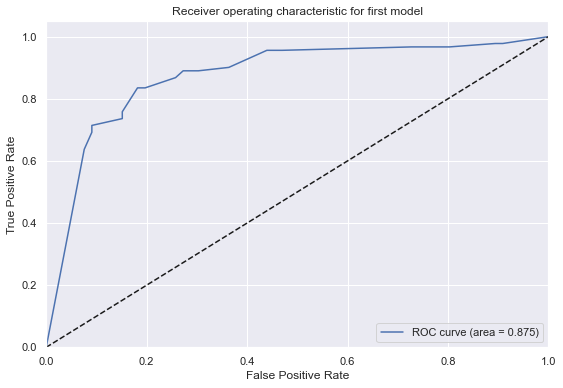

In [238]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for first model')
plt.legend(loc="lower right")
plt.show()

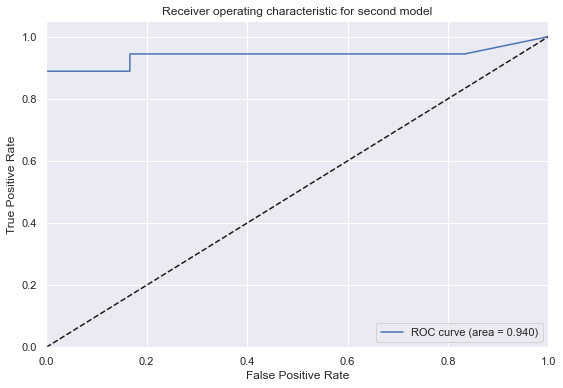

In [239]:
fpr, tpr, thresholds = roc_curve(y_test2, y_pred2[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for second model')
plt.legend(loc="lower right")
plt.show()

We can see that the second model is showing better results on its test data. Let's predict something on all the data!

In [240]:
y_pred_all = estimator_1.predict_proba(X)
y_pred2_all = estimator_2.predict_proba(X2)

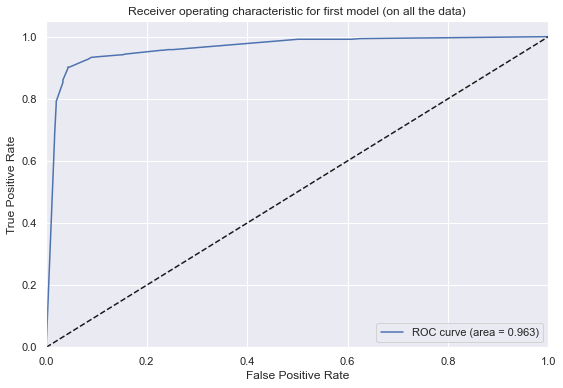

In [241]:
fpr, tpr, thresholds = roc_curve(y, y_pred_all[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for first model (on all the data)')
plt.legend(loc="lower right")
plt.show()

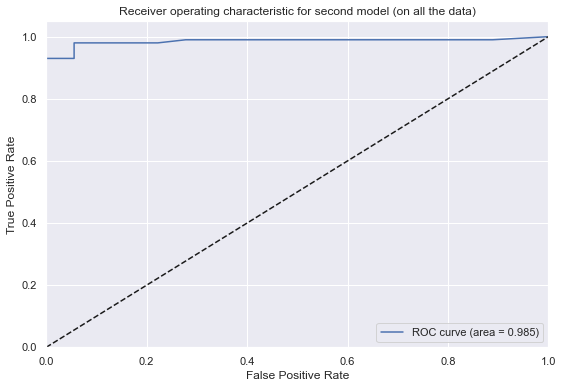

In [242]:
fpr, tpr, thresholds = roc_curve(y2, y_pred2_all[:,1])
roc_auc= auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % (roc_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for second model (on all the data)')
plt.legend(loc="lower right")
plt.show()

The second model wins. Amount of comments per user matters.

It is moderate likely that it is overfitting, but we will hope it is not.

We will use either models.